✅ CreditCard Data loaded successfully.
Shape: (284807, 31)

--- Missing Values ---
0

--- Class Distribution (The Imbalance) ---
Class
0    284315
1       492
Name: count, dtype: int64
Fraud Rate: 0.1727%


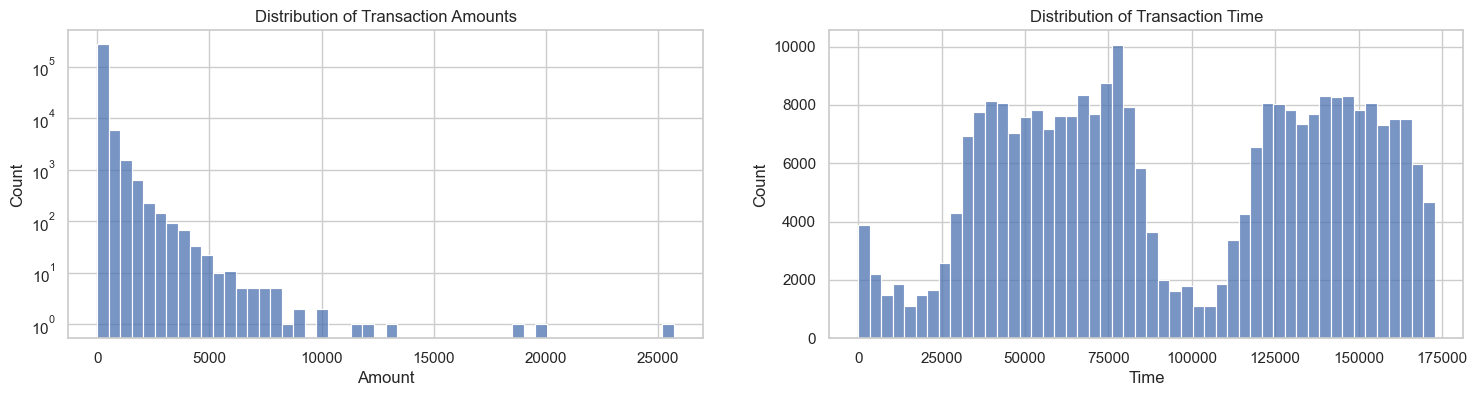

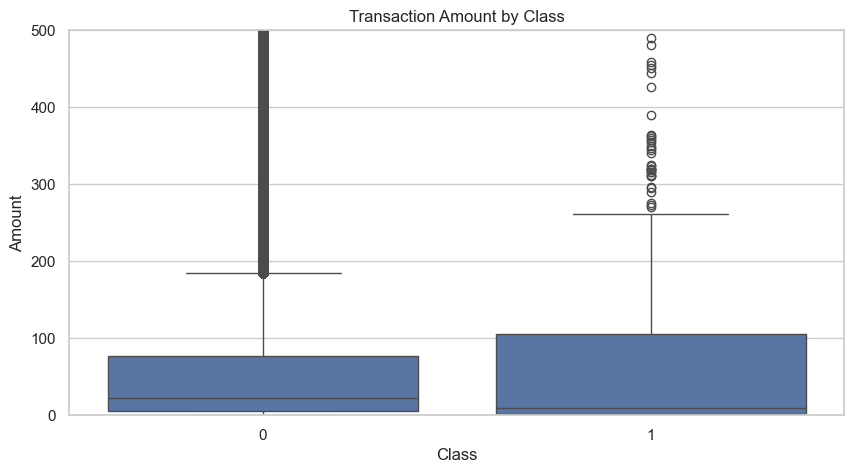

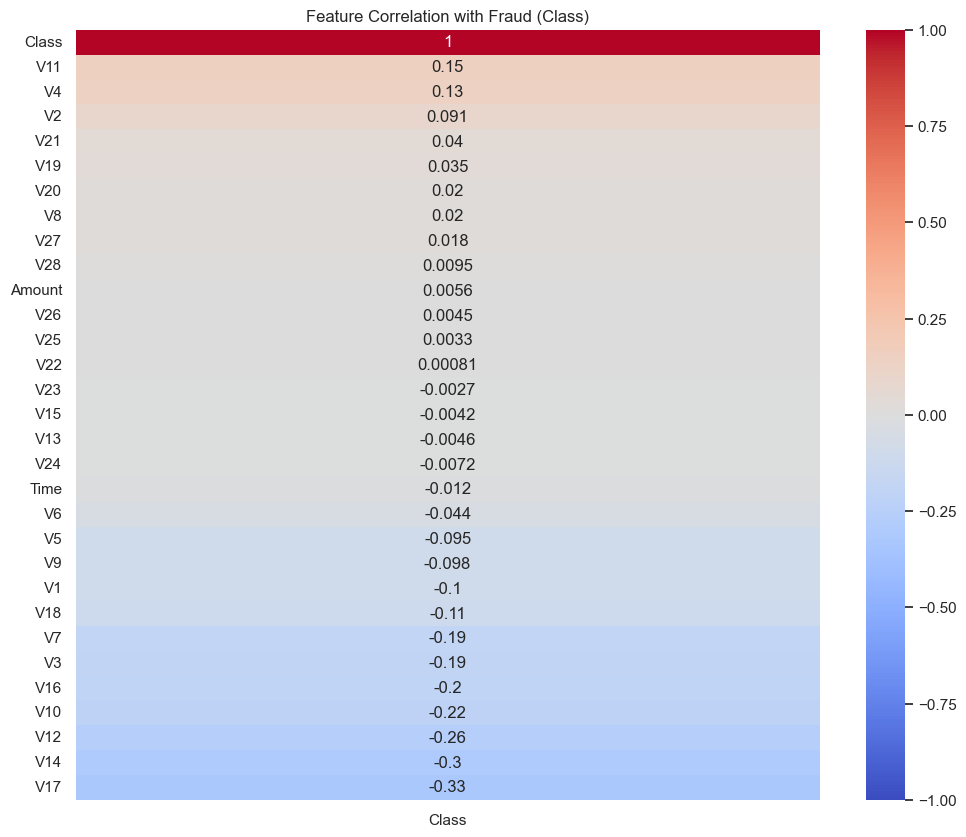

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Load Data
try:
    credit_df = pd.read_csv('../data/raw/creditcard.csv')
    print("✅ CreditCard Data loaded successfully.")
    print(f"Shape: {credit_df.shape}")
except FileNotFoundError:
    print("❌ File not found.")

# 2. Basic Inspection
print("\n--- Missing Values ---")
print(credit_df.isnull().sum().max()) # Should be 0

print("\n--- Class Distribution (The Imbalance) ---")
count = credit_df['Class'].value_counts()
print(count)
print(f"Fraud Rate: {(count[1]/len(credit_df))*100:.4f}%")
# This is usually MUCH lower than the ecommerce dataset (often < 0.2%)

# 3. Analyze 'Amount' and 'Time'
# These are the only non-anonymized features.

fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Amount Distribution (Log scale usually helps visualization)
sns.histplot(credit_df['Amount'], bins=50, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amounts')
ax[0].set_yscale('log') # Log scale to see the outliers

# Time Distribution
sns.histplot(credit_df['Time'], bins=50, ax=ax[1])
ax[1].set_title('Distribution of Transaction Time')
# 'Time' is seconds elapsed since first transaction. Look for day/night cycles.

plt.show()

# 4. Compare Fraud vs. Non-Fraud Amounts
# Do fraudsters steal small amounts or large amounts?
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title('Transaction Amount by Class')
plt.ylim(0, 500) # Zoom in to see the box clearly (remove if you want to see max outliers)
plt.show()

# 5. Correlation Matrix
# We want to see if any V-features strongly correlate with Class (Fraud)
plt.figure(figsize=(12, 10))
corr = credit_df.corr()
# We focus on correlation with 'Class'
# High negative or positive correlation means the feature is a strong predictor.
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Fraud (Class)')
plt.show()